# Euler Theory and Example
## Euler's Method theory
#### Lett us consider we have $\frac{dy}{dt} = f(t,y)$ and $y(t_0) = y_0$. Now if we consider $\Delta t$ as the time interval then we may write
#### $y(t+\Delta t) = y(t) + \frac{dy}{dt}* \Delta t$ By Taylor expansion and we are not considering the higher order terms here.
#### From this we may write $y_{n+1} = y_n + f(t_n,y_n) * \Delta t $



## Example:
#### Let's consider an equation of $\frac{dx}{dt} = -k*x$ and we have $x(0) = 0$ which is the inital condition so we already know from the eulers formula that $x(n+1) = x(n) - k*x(n)*dt$

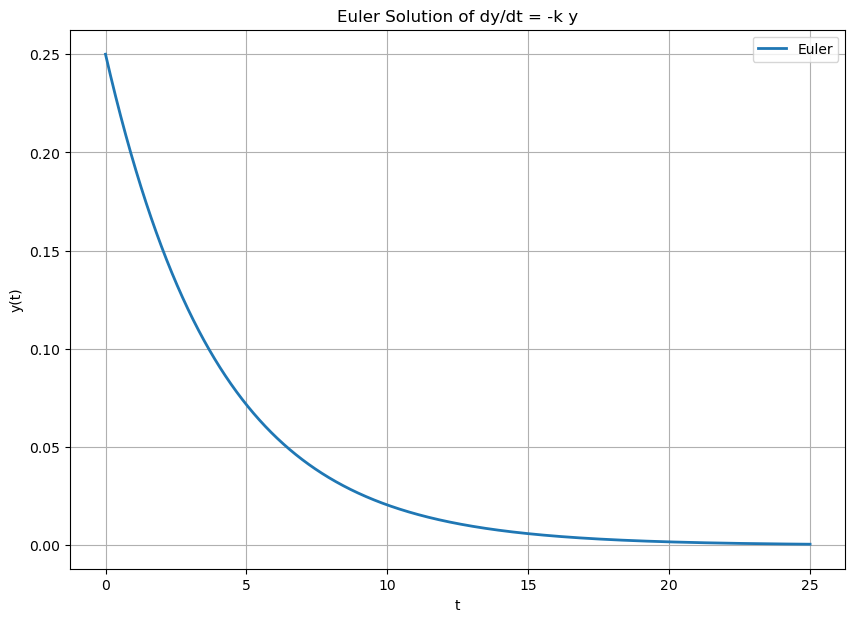

In [6]:
import numpy as np
import matplotlib.pyplot as plt

k = 0.25
tmin = 0
tmax = 25
dt = 0.01
t = np.arange(tmin,tmax,dt)
x = np.zeros_like(t)
x[0] = 0.25 #Initial condition

for n in range(len(t) - 1):
    x[n+1] = x[n] - k*x[n]*dt


plt.figure(figsize=(10,7))
plt.plot(t, x, label = "Euler", lw=2)
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.title("Euler Solution of dy/dt = -k y")
plt.grid(True)
plt.show()

## Runge-Kutta 2 Theory and Example
#### Let us consider there is a differential equation like $\frac{dy}{dt} = f(t,y)$ So now we can use the formula like $k_1 = f(t_n,y_n)$ & $k_2 = (t_n + \frac{\delta t}{2}, y_n + \frac{\delta t}{2}*k_1)$
#### Now we will use this formulas in the loop where we are using len() function to count how many steps we have to go, and that step count is depending on the t variable which is defined by arange as it will give us a integer value.

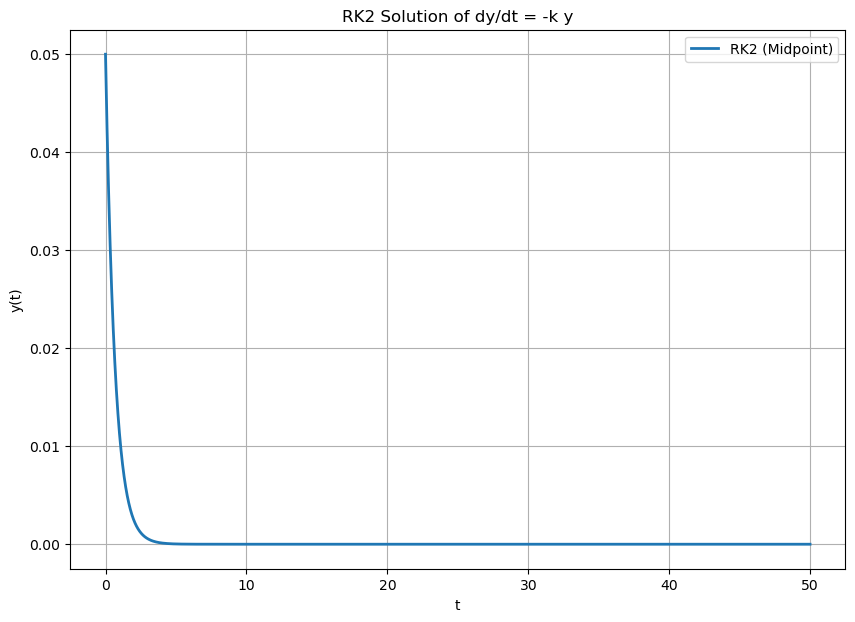

In [2]:
import numpy as np
import matplotlib.pyplot as plt

k = 1.5
y0 = 0.05
tmin = 0.0
tmax = 50.0
dt = 0.01


t = np.arange(tmin, tmax, dt)
y = np.zeros_like(t)
y[0] = y0


def f(t, y):
    return -k * y #Define the function to call later In euler we simply write the formula under for loop here we are defining it for simplicity and clean code


for n in range(len(t) - 1):
    k1 = f(t[n], y[n]) #Calling the function [n] tells the steps like 0,1,2 ...
    k2 = f(t[n] + dt/2, y[n] + dt*k1/2) #This is general formula from the theory we derived.
    y[n+1] = y[n] + dt * k2


plt.figure(figsize=(10,7))
plt.plot(t, y, label="RK2 (Midpoint)", lw=2)
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.title("RK2 Solution of dy/dt = -k y")
plt.grid(True)
plt.show()


## Comparison of Euler and RK2 Methods

From the numerical results, we observe that the **RK2 (midpoint) method is slightly more accurate than the Euler method** for the given example.  
To demonstrate this, a **comparable code has been written for both numerical methods**, and their results are compared with the **analytical solution** of the differential equation.

---

## Analytical Solution of the Differential Equation

$$
\frac{dy}{dt} = -k y
$$

### Step 1: Separation of variables

$$
\frac{dy}{y} = -k \, dt
$$

### Step 2: Integrate both sides

$$
\int \frac{dy}{y} = \int -k \, dt
$$

$$
\ln y = -kt + C
$$

### Step 3: Exponentiation

$$
y(t) = C e^{-kt}
$$

### Step 4: Apply the initial condition

Given
$$
y(0) = y_0
$$

$$
y_0 = C e^{0} \Rightarrow C = y_0
$$

### Final analytical solution

$$
\boxed{
y(t) = y_0 e^{-kt}
}
$$


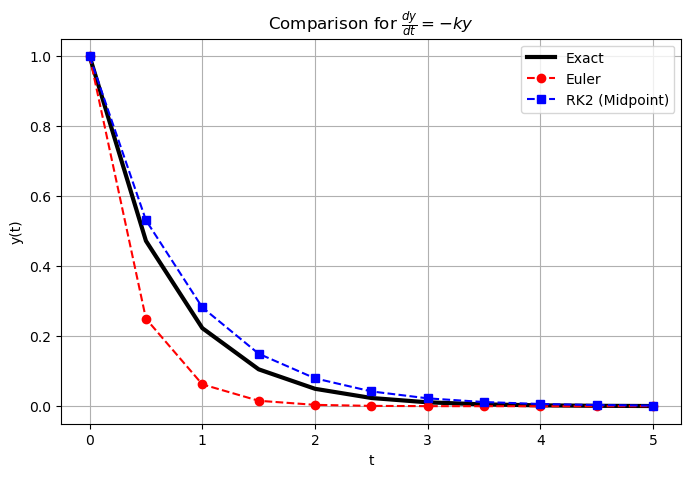

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
k = 1.5
y0 = 1.0
tmin = 0.0
tmax = 5.0
h = 0.5

# Time array
t = np.arange(tmin, tmax + h, h)

# Exact solution
y_exact = y0 * np.exp(-k * t)

# Euler method
y_euler = np.zeros_like(t)
y_euler[0] = y0
for n in range(len(t) - 1):
    y_euler[n+1] = y_euler[n] - k * y_euler[n] * h

# RK2 (Midpoint)
y_rk2 = np.zeros_like(t)
y_rk2[0] = y0
for n in range(len(t) - 1):
    k1 = -k * y_rk2[n]
    k2 = -k * (y_rk2[n] + 0.5 * h * k1)
    y_rk2[n+1] = y_rk2[n] + h * k2

# Plot
plt.figure(figsize=(8,5))
plt.plot(t, y_exact, 'k-', lw=3, label="Exact")
plt.plot(t, y_euler, 'ro--', label="Euler")
plt.plot(t, y_rk2, 'bs--', label="RK2 (Midpoint)")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title(r"Comparison for $\frac{dy}{dt} = -ky$")
plt.legend()
plt.grid(True)
plt.show()


## Fourth-Order Runge–Kutta (RK4) Method

For the first-order differential equation

$$
\frac{dy}{dt} = f(t,y)
$$

the RK4 update scheme is given by

$$
k_1 = f(t_n, y_n)
$$

$$
k_2 = f\left(t_n + \frac{h}{2},\, y_n + \frac{h}{2} k_1 \right)
$$

$$
k_3 = f\left(t_n + \frac{h}{2},\, y_n + \frac{h}{2} k_2 \right)
$$

$$
k_4 = f\left(t_n + h,\, y_n + h k_3 \right)
$$

The solution is advanced as

$$
\boxed{
y_{n+1} = y_n + \frac{h}{6}\left(k_1 + 2k_2 + 2k_3 + k_4\right)
}
$$

#### Observation and Conclusion

From the numerical results, it is observed that the **RK4 solution almost exactly overlaps with the analytical solution** for the given differential equation. This demonstrates the **high accuracy and reliability of the fourth-order Runge–Kutta method**.

Due to its fourth-order accuracy and stable performance, the RK4 method is one of the **most reliable and widely used numerical techniques** for solving first-order ordinary differential equations.



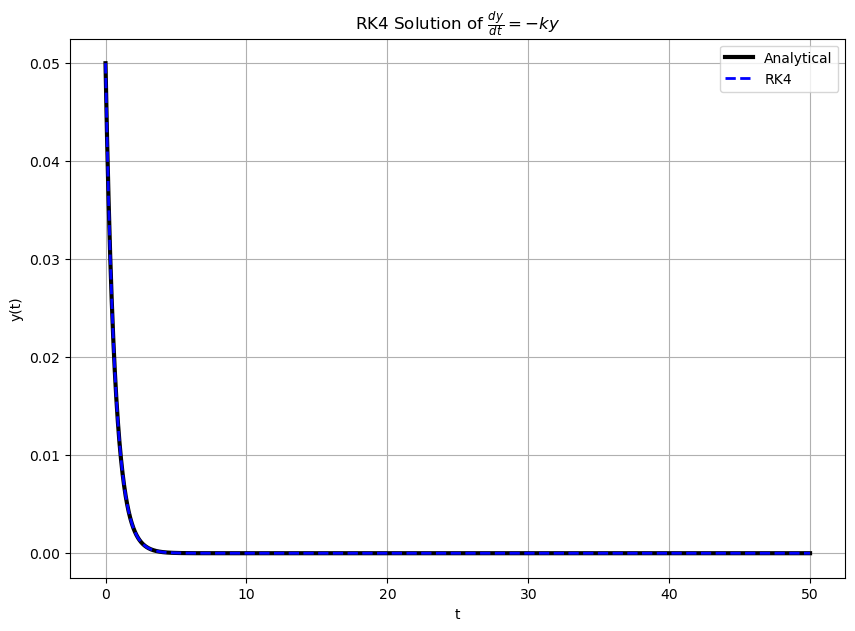

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
k = 1.5
y0 = 0.05
tmin = 0.0
tmax = 50.0
dt = 0.01

# Time array
t = np.arange(tmin, tmax, dt)

# Allocate solution array
y_rk4 = np.zeros_like(t)
y_rk4[0] = y0

# RHS function
def f(t, y):
    return -k * y

# RK4 loop
for n in range(len(t) - 1):
    k1 = f(t[n], y_rk4[n])
    k2 = f(t[n] + dt/2, y_rk4[n] + dt*k1/2)
    k3 = f(t[n] + dt/2, y_rk4[n] + dt*k2/2)
    k4 = f(t[n] + dt,   y_rk4[n] + dt*k3)

    y_rk4[n+1] = y_rk4[n] + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)

# Analytical solution
y_exact = y0 * np.exp(-k * t)

# Plot
plt.figure(figsize=(10,7))
plt.plot(t, y_exact, 'k', lw=3, label="Analytical")
plt.plot(t, y_rk4, '--b', lw=2, label="RK4")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title(r"RK4 Solution of $\frac{dy}{dt} = -ky$")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\sb\AppData\Local\Temp\ipykernel_9992\2817416153.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_scipy[i] = solver.y


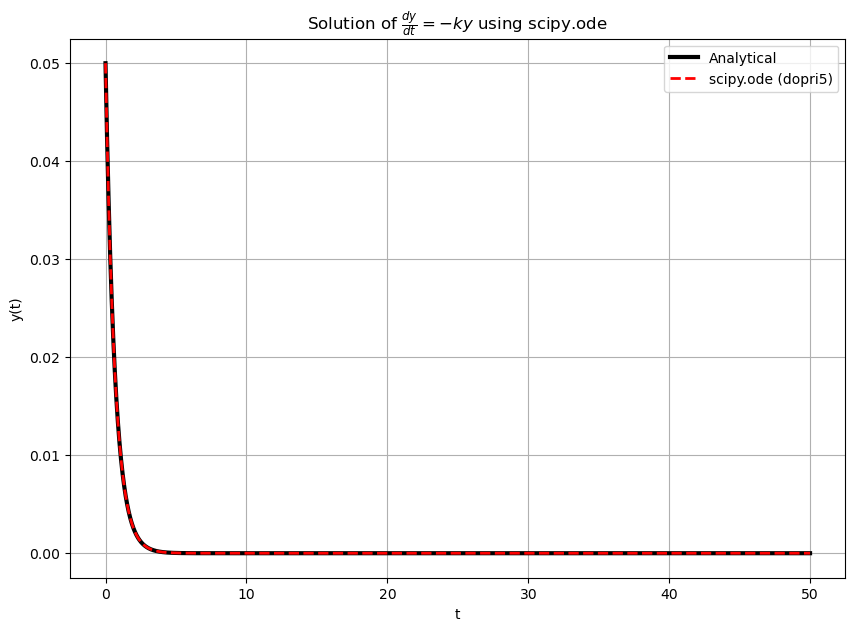

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode

k = 1.5

def f(t, y):
    return -k * y
y0 = 0.05
t0 = 0.0
tmax = 50.0
dt = 0.01
solver = ode(f)
solver.set_integrator("dopri5")   # Dormand–Prince RK45
solver.set_initial_value(y0, t0)

t = np.arange(t0, tmax, dt)
y_scipy = np.zeros_like(t)
y_scipy[0] = y0

for i in range(1, len(t)):
    solver.integrate(t[i])
    y_scipy[i] = solver.y
y_exact = y0 * np.exp(-k * t)
plt.figure(figsize=(10,7))
plt.plot(t, y_exact, 'k', lw=3, label="Analytical")
plt.plot(t, y_scipy, '--r', lw=2, label="scipy.ode (dopri5)")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title(r"Solution of $\frac{dy}{dt} = -ky$ using scipy.ode")
plt.legend()
plt.grid(True)
plt.show()


## Numerical Solution using `scipy.integrate.ode`

In this section, we solve the first-order differential equation

$$
\frac{dy}{dt} = -k y
$$

using the **`scipy.integrate.ode`** solver, which employs **adaptive Runge–Kutta algorithms** to achieve high accuracy and numerical stability.

The `scipy.integrate.ode` function is an **inbuilt solver in the SciPy library**. In this approach, we define the differential equation, initial conditions, and relevant parameters such as the decay constant \( k \) and the time interval. The solver then allows us to choose an appropriate numerical integration method (for example, `dopri5`) to obtain the solution efficiently.

This method is **fast, robust, and easy to use**, as SciPy provides a wide range of well-tested numerical algorithms. Unlike manual implementations of Euler, RK2, or RK4 methods, we do not need to explicitly remember or implement the update formulas. Therefore, `scipy.integrate.ode` offers a **clean and reliable way to solve ordinary differential equations (ODEs) and initial value problems (IVPs)** in Python.
